## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Sklearn Libraries 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

## Importing the required data

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\american_bankruptcy.csv")

In [3]:
df

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [4]:
df.shape

(78682, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [6]:
df.describe()

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


In [10]:
df.dtypes

company_name     object
status_label     object
year              int64
X1              float64
X2              float64
X3              float64
X4              float64
X5              float64
X6              float64
X7              float64
X8              float64
X9              float64
X10             float64
X11             float64
X12             float64
X13             float64
X14             float64
X15             float64
X16             float64
X17             float64
X18             float64
dtype: object

## Data preprocessing

In [7]:
df.isnull().sum()

company_name    0
status_label    0
year            0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
dtype: int64

In [8]:
df.isnull().sum()*100/len(df)

company_name    0.0
status_label    0.0
year            0.0
X1              0.0
X2              0.0
X3              0.0
X4              0.0
X5              0.0
X6              0.0
X7              0.0
X8              0.0
X9              0.0
X10             0.0
X11             0.0
X12             0.0
X13             0.0
X14             0.0
X15             0.0
X16             0.0
X17             0.0
X18             0.0
dtype: float64

## Data visualization 

In [11]:
df = df.sample(n=2000)

In [12]:
df

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
66251,C_7139,alive,2010,15815.000,42657.000,443.000,1513.000,6635.000,2354.000,3401.000,...,45707.000,26001.000,2551.000,1070.000,3050.000,10004.000,6736.000,45707.000,13447.000,44194.000
20983,C_1766,alive,2013,90.114,409.303,12.900,22.004,33.992,4.007,43.620,...,467.250,224.618,72.739,9.104,57.947,35.640,-3.970,467.250,141.725,445.246
22808,C_1953,failed,2003,432.893,477.321,95.493,-5.870,71.426,-129.704,133.166,...,961.748,649.854,291.956,-101.363,484.427,431.404,-1625.974,961.748,814.745,967.618
71350,C_7749,alive,2015,457.481,586.060,45.729,272.410,96.965,133.453,41.477,...,889.336,1530.155,575.837,226.681,303.276,184.144,353.898,889.336,993.858,616.926
37374,C_3777,alive,2015,1.141,3.647,0.328,-1.569,0.970,-27.162,0.015,...,3.524,2.925,0.002,-1.897,-0.123,34.886,-30.589,3.524,34.965,5.093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19701,C_1657,alive,2012,1425.940,2156.867,70.218,450.514,412.384,234.072,517.074,...,3029.541,2568.551,472.593,380.296,872.674,412.433,1344.467,3029.541,1161.541,2579.027
48088,C_5062,alive,2011,6.574,1.380,0.623,0.816,0.000,-0.242,1.675,...,7.531,40.168,0.000,0.193,6.151,2.428,13.557,7.531,6.703,6.715
13750,C_1137,alive,2015,2.193,0.000,0.000,11.572,0.000,11.581,0.000,...,12.391,2.193,0.000,11.572,12.391,2.114,0.079,12.391,2.114,0.819
30611,C_2986,alive,2015,26.764,4.958,0.335,-19.712,8.209,-20.018,1.501,...,8.950,28.245,0.000,-20.047,3.992,7.982,-173.058,8.950,7.982,28.662


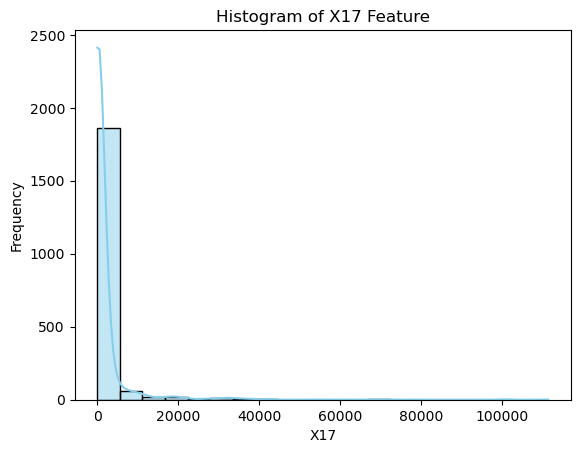

In [13]:
## Histogram of a random Feature

sns.histplot(df['X17'], bins=20, color='skyblue', edgecolor='black',kde=True)
plt.xlabel('X17')
plt.ylabel('Frequency')
plt.title('Histogram of X17 Feature')
plt.show()

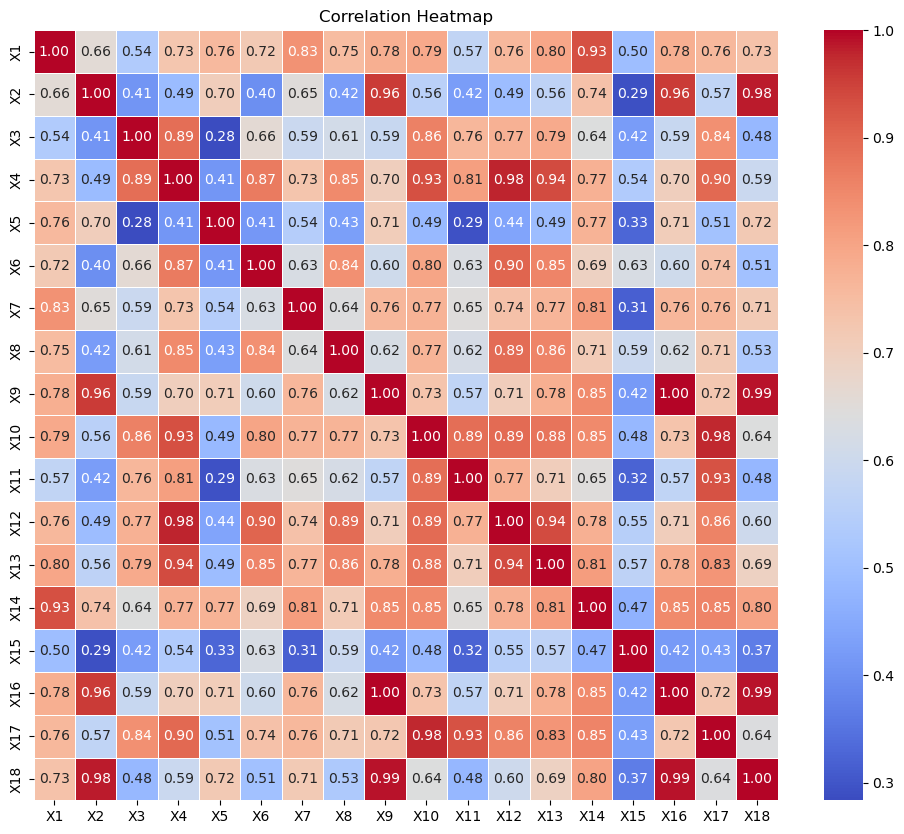

In [14]:
## Correlation Heatmap

correlation_matrix = df.drop(['company_name', 'status_label','year'], axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

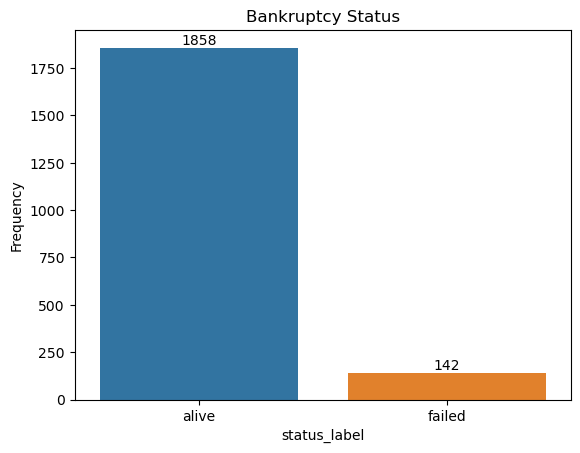

In [15]:
ax = sns.countplot(x='status_label',data=df)

for i in ax.containers:
    ax.bar_label(i)
    
plt.xlabel('status_label')
plt.ylabel('Frequency')
plt.title('Bankruptcy Status')
plt.show()

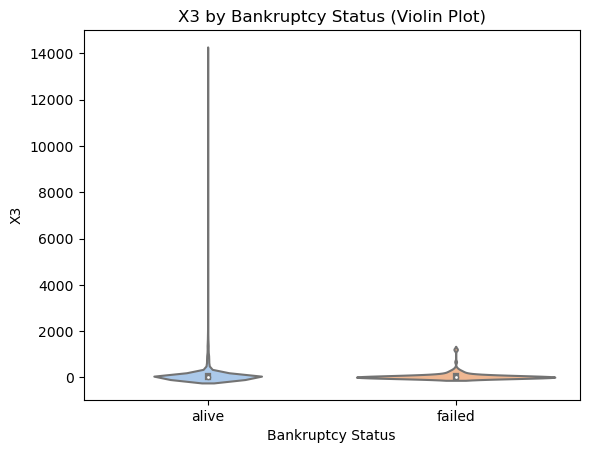

In [16]:
# Violin Plot of a Feature by Bankruptcy Status

sns.violinplot(x='status_label', y='X3', data=df, palette='pastel')
plt.xlabel('Bankruptcy Status')
plt.ylabel('X3')
plt.title('X3 by Bankruptcy Status (Violin Plot)')
plt.show()

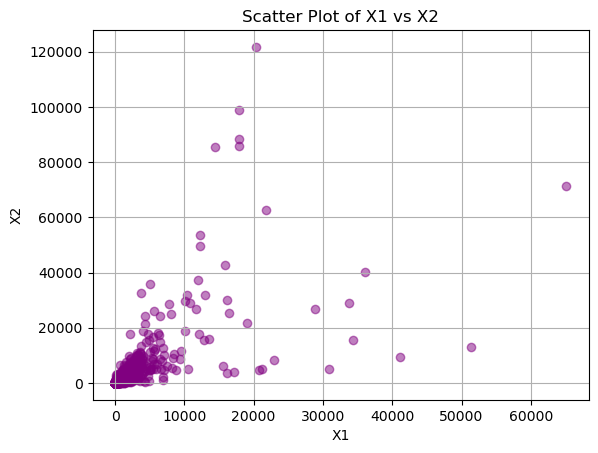

In [17]:
### Scatter Plot of Two Features 

plt.scatter(df['X1'], df['X2'], color='purple', alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of X1 vs X2')
plt.grid(True)
plt.show()

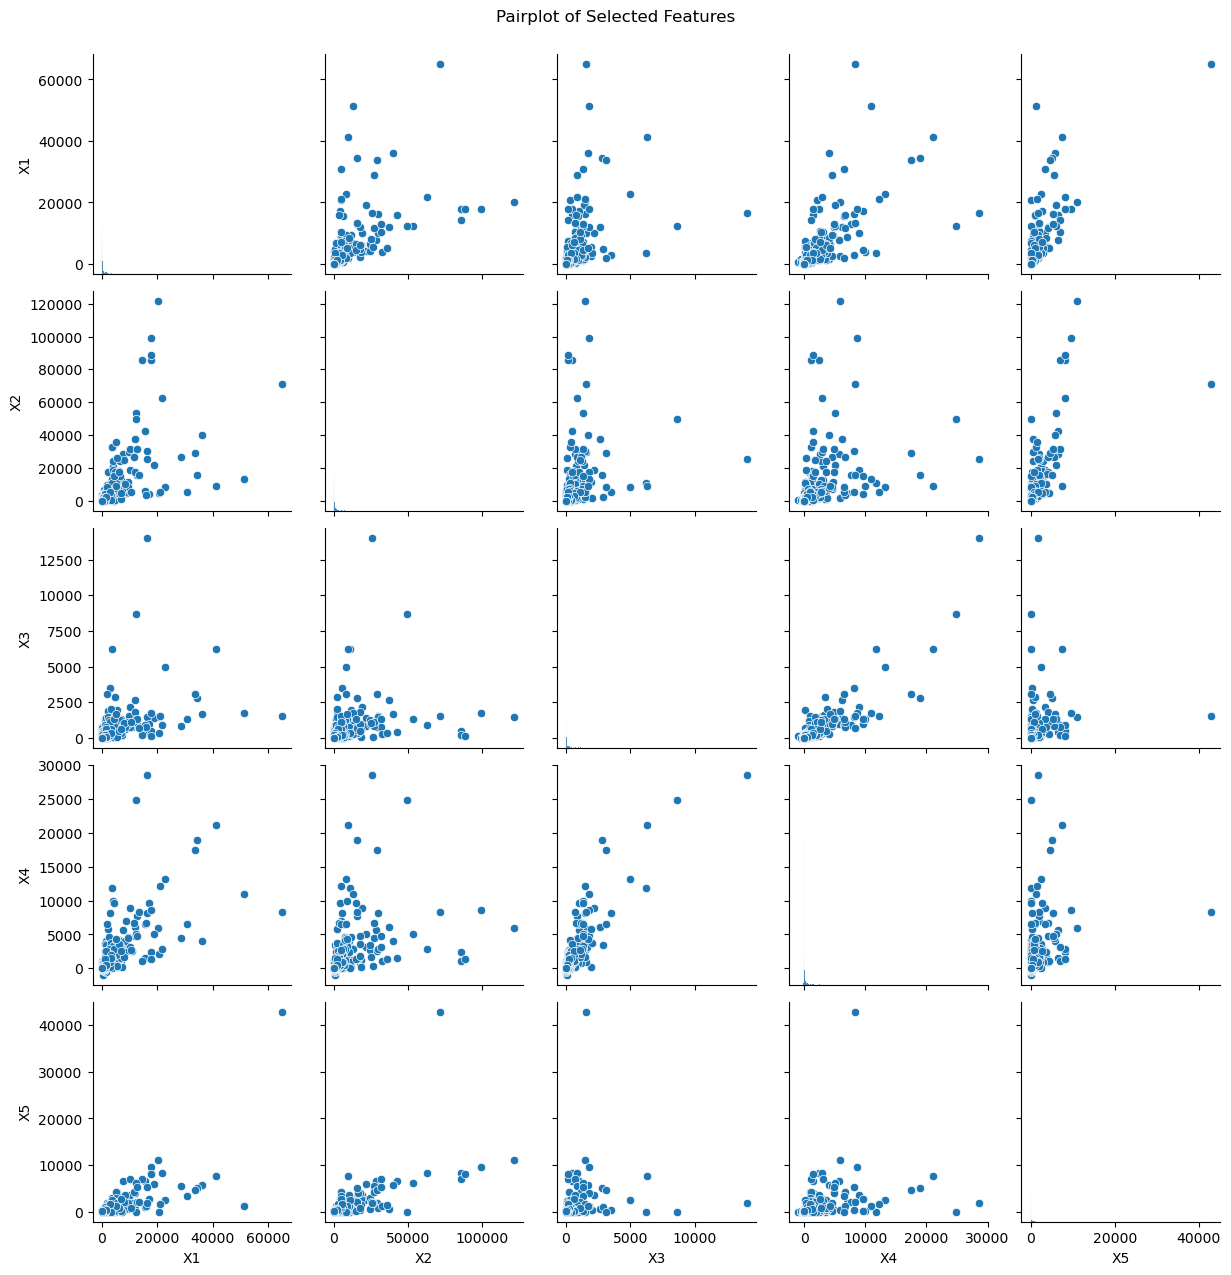

In [18]:
## Pairplot for Multiple Features

features = ['X1', 'X2', 'X3', 'X4', 'X5']
sns.pairplot(df[features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

## Feature Engineering

In [19]:
df.drop('company_name',axis=1,inplace=True)

In [20]:
numerical_cols = ['year','X1','X2','X3','X4','X5','X6','X7','X8','X9','X9','X10',
                  'X11','X12','X13','X14','X15','X16','X17','X18']
scaler = StandardScaler()
scaler_cols = pd.DataFrame(scaler.fit_transform(df[numerical_cols]),columns=scaler.get_feature_names_out(numerical_cols))

In [21]:
scaler_cols

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,0.402881,4.433084,6.244882,0.638014,0.728486,5.200569,2.613230,3.208487,0.395907,4.987095,4.987095,2.078032,0.602496,0.716741,0.736532,3.756328,1.321187,4.987095,1.640139,5.499841
1,0.929868,-0.235724,-0.167783,-0.196207,-0.225193,-0.153607,-0.159664,-0.236937,-0.211130,-0.210295,-0.210295,-0.240706,-0.226830,-0.222027,-0.235582,-0.232549,-0.097091,-0.210295,-0.235287,-0.192357
2,-0.826754,-0.133951,-0.157459,-0.036010,-0.243022,-0.123243,-0.317438,-0.145042,-0.207067,-0.153484,-0.153484,-0.202453,-0.153472,-0.319778,-0.097020,-0.074182,-0.438406,-0.153484,-0.140422,-0.124391
3,1.281192,-0.126651,-0.140953,-0.132532,-0.065027,-0.102528,-0.006923,-0.239136,-0.162952,-0.161804,-0.161804,-0.123265,-0.058473,-0.029497,-0.155875,-0.173124,-0.021786,-0.161804,-0.115176,-0.170019
4,1.281192,-0.262141,-0.229356,-0.220592,-0.240271,-0.180391,-0.196442,-0.281685,-0.218738,-0.263570,-0.263570,-0.260648,-0.251171,-0.231762,-0.254449,-0.232851,-0.102693,-0.263570,-0.250335,-0.249626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.754205,0.160890,0.097475,-0.085034,0.048893,0.153313,0.111803,0.248933,0.012242,0.084075,0.084075,-0.029855,-0.093023,0.106434,0.029121,-0.081774,0.186658,0.084075,-0.091540,0.085272
1996,0.578543,-0.260528,-0.229700,-0.220020,-0.238746,-0.181178,-0.164678,-0.279981,-0.209413,-0.263110,-0.263110,-0.257298,-0.251172,-0.229912,-0.252411,-0.245839,-0.093403,-0.263110,-0.254319,-0.249415
1997,1.281192,-0.261828,-0.229910,-0.221228,-0.231866,-0.181178,-0.150727,-0.281700,-0.216170,-0.262552,-0.262552,-0.260714,-0.251172,-0.219843,-0.250383,-0.245964,-0.096239,-0.262552,-0.254966,-0.250182
1998,1.281192,-0.254533,-0.229157,-0.220579,-0.251876,-0.174520,-0.188013,-0.280160,-0.208407,-0.262947,-0.262947,-0.258371,-0.251172,-0.247822,-0.253112,-0.243616,-0.132672,-0.262947,-0.254139,-0.246559


In [22]:
df['status_label'] = df['status_label'].map({'alive':0,'failed':1})

In [23]:
df

,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
66251,0,2010,15815.000,42657.000,443.000,1513.000,6635.000,2354.000,3401.000,9607.5252,45707.000,26001.000,2551.000,1070.000,3050.000,10004.000,6736.000,45707.000,13447.000,44194.000
20983,0,2013,90.114,409.303,12.900,22.004,33.992,4.007,43.620,169.3479,467.250,224.618,72.739,9.104,57.947,35.640,-3.970,467.250,141.725,445.246
22808,1,2003,432.893,477.321,95.493,-5.870,71.426,-129.704,133.166,232.5281,961.748,649.854,291.956,-101.363,484.427,431.404,-1625.974,961.748,814.745,967.618
71350,0,2015,457.481,586.060,45.729,272.410,96.965,133.453,41.477,918.4266,889.336,1530.155,575.837,226.681,303.276,184.144,353.898,889.336,993.858,616.926
37374,0,2015,1.141,3.647,0.328,-1.569,0.970,-27.162,0.015,51.0700,3.524,2.925,0.002,-1.897,-0.123,34.886,-30.589,3.524,34.965,5.093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19701,0,2012,1425.940,2156.867,70.218,450.514,412.384,234.072,517.074,3642.3347,3029.541,2568.551,472.593,380.296,872.674,412.433,1344.467,3029.541,1161.541,2579.027
48088,0,2011,6.574,1.380,0.623,0.816,0.000,-0.242,1.675,196.0523,7.531,40.168,0.000,0.193,6.151,2.428,13.557,7.531,6.703,6.715
13750,0,2015,2.193,0.000,0.000,11.572,0.000,11.581,0.000,90.9909,12.391,2.193,0.000,11.572,12.391,2.114,0.079,12.391,2.114,0.819
30611,0,2015,26.764,4.958,0.335,-19.712,8.209,-20.018,1.501,211.6984,8.950,28.245,0.000,-20.047,3.992,7.982,-173.058,8.950,7.982,28.662


## Train Test Split

In [24]:
x =  scaler_cols
y = df['status_label']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 20) (1600, 20) (400, 20)


In [27]:
print(y.shape,y_train.shape,y_test.shape)

(2000,) (1600,) (400,)


## Model Building

In [28]:
svm = SVC(kernel='linear')

In [29]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [30]:
y_pred = svm.predict(x_test)

In [31]:
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy : {acc*100}")

Accuracy : 94.0


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       376
           1       0.00      0.00      0.00        24

    accuracy                           0.94       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.88      0.94      0.91       400



## Confusion Metrics

In [33]:
from sklearn.metrics import confusion_matrix

Confusion Metrics : [[376   0]
 [ 24   0]]


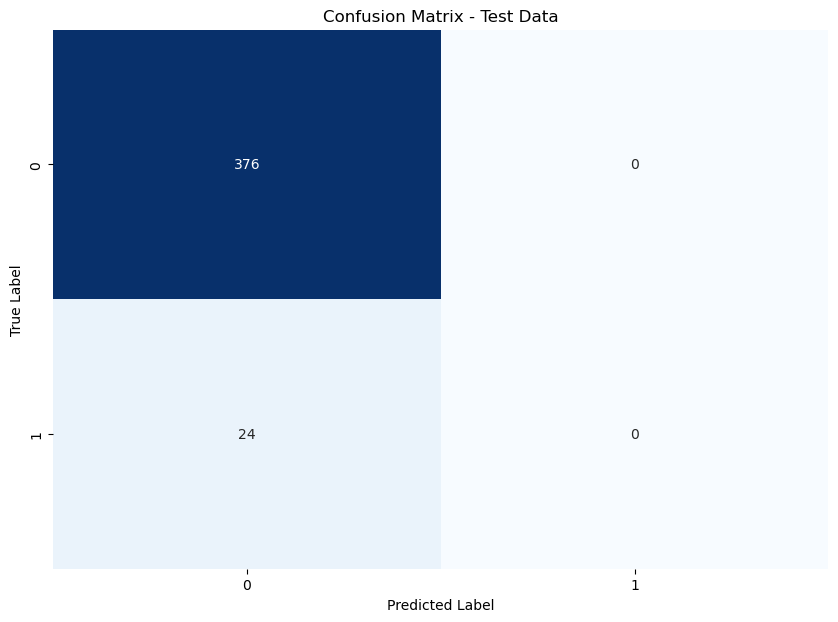

In [34]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Metrics : {cm}")

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Binarize

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [36]:
yb = label_binarize(y,classes=[0,1])

In [37]:
noofclass = yb.shape[1]

In [38]:
classifier = OneVsRestClassifier(SVC(kernel='linear',probability=True,random_state=0))

In [39]:
y_score = classifier.fit(x_train,y_train).decision_function(x_test)

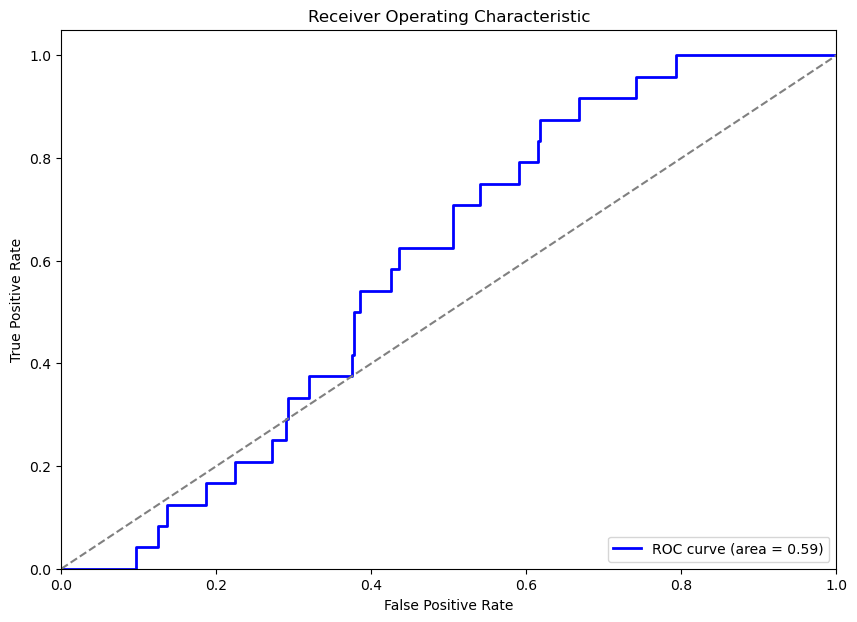

In [40]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curvea
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

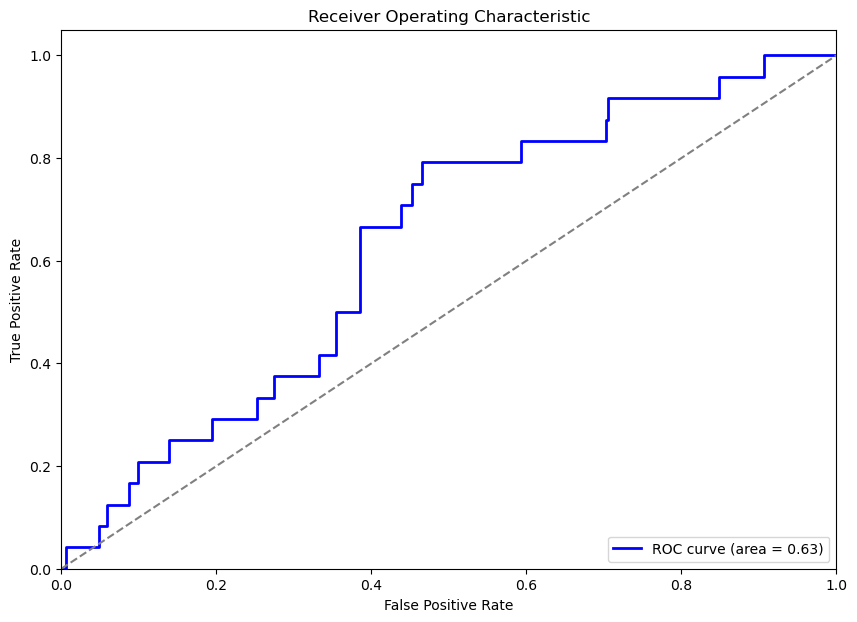

In [41]:
classifier = OneVsRestClassifier(SVC(kernel='rbf',probability=True,random_state=0))

y_score = classifier.fit(x_train,y_train).decision_function(x_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curvea
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

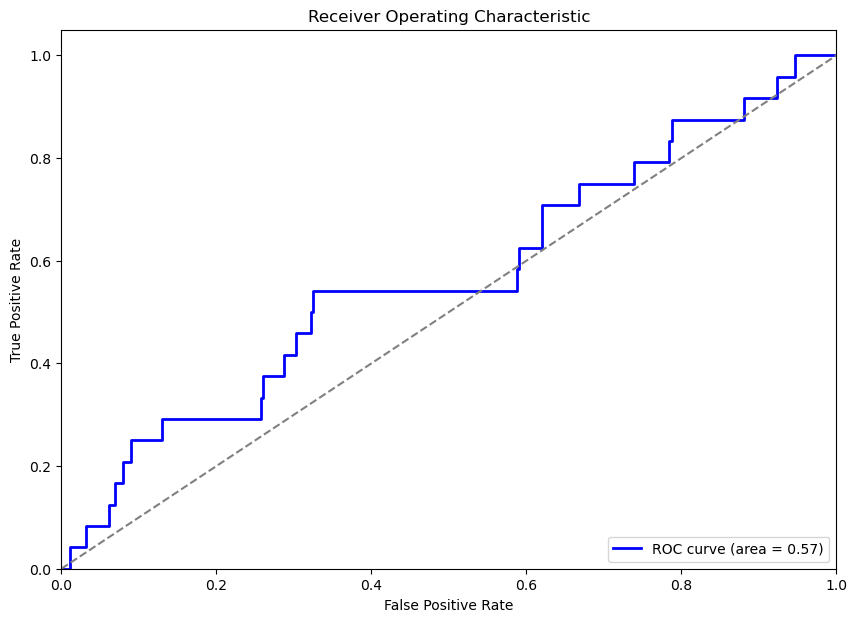

In [42]:
classifier = OneVsRestClassifier(SVC(kernel='sigmoid',probability=True,random_state=0))

y_score = classifier.fit(x_train,y_train).decision_function(x_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curvea
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

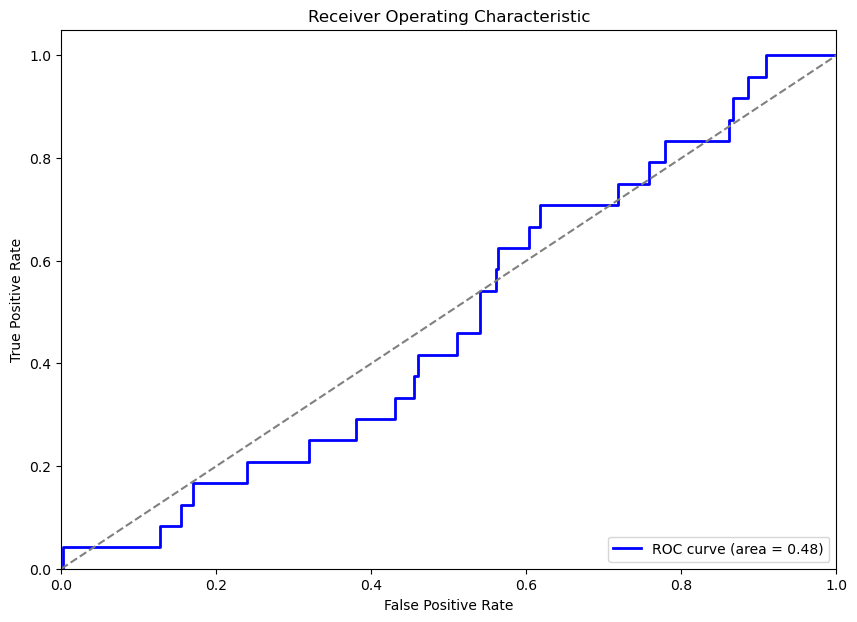

In [43]:
classifier = OneVsRestClassifier(SVC(kernel='poly',probability=True,random_state=0))

y_score = classifier.fit(x_train,y_train).decision_function(x_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curvea
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [45]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Penalty parameter C of the error term
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient for 'rbf'
    'kernel': ['linear']}

In [46]:
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5)

In [47]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear']})

In [48]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best cross-validation score: 0.93


In [49]:
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(x_test)

In [50]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       376
           1       0.00      0.00      0.00        24

    accuracy                           0.94       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.88      0.94      0.91       400



## RandomizedSearchCV

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [52]:
param_dist = {
    'C': uniform(0.1, 10),  # Penalty parameter C of the error term
    'gamma': uniform(0.001, 1),  # Kernel coefficient for 'rbf'
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Kernel type         
}

In [53]:
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

In [54]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020D770FE810>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020D77A6F750>,
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42)

In [55]:
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

Best parameters found:  {'C': 3.845401188473625, 'gamma': 0.9517143064099162, 'kernel': 'rbf'}
Best cross-validation score: 0.93


In [56]:
best_svm_model = random_search.best_estimator_
y_pred = best_svm_model.predict(x_test)

In [57]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       376
           1       0.00      0.00      0.00        24

    accuracy                           0.94       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.88      0.94      0.91       400



## BayesSearchCV

In [58]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [59]:
from skopt import BayesSearchCV

In [60]:
from skopt.space import Real,Categorical

In [61]:
svm1 = SVC()

In [62]:
parameter_by = {
    'C': Real(1e-6,1e+6,prior='log-uniform'),
    'gamma': Real(1e-6,1e+6,prior='log-uniform')}

In [63]:
n_iter = 50

In [64]:
bayes_search = BayesSearchCV(svm1,parameter_by,n_iter=n_iter,cv=5)

In [65]:
bayes_search.fit(x_train,y_train)

BayesSearchCV(cv=5, estimator=SVC(),
              search_spaces={'C': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize'),
                             'gamma': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')})

In [66]:
best_params = bayes_search.best_params_
best_model = bayes_search.best_estimator_

y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)

print(f"Accuracy : {accuracy*100}")

Accuracy : 94.0


 # Naive Bayes

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [68]:
df['combined_features'] = df.iloc[:, 2:].apply(lambda row: ' '.join(row.astype(str)), axis=1)

In [69]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['combined_features'])
y = df['status_label']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
MNB = MultinomialNB()

In [72]:
MNB.fit(X_train, y_train)

MultinomialNB()

In [73]:
y_pred = MNB.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : {:.2f}%'.format(accuracy*100))

Accuracy : 78.50%


In [75]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       359
           1       0.00      0.00      0.00        41

    accuracy                           0.79       400
   macro avg       0.44      0.44      0.44       400
weighted avg       0.79      0.79      0.79       400



### Confusion Metrics

In [76]:
import sklearn.metrics as m

Text(0.5, 1.0, 'Confusion Matrix-Spam')

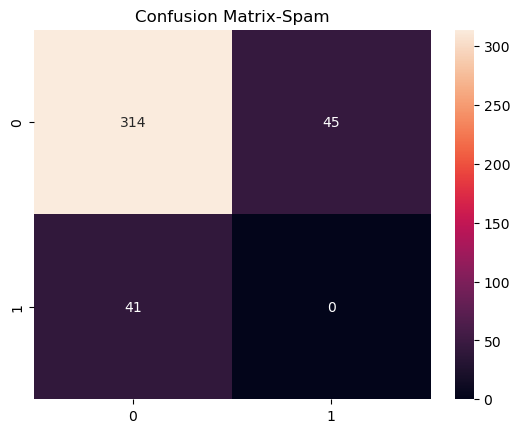

In [77]:
cm = m.confusion_matrix(y_test,y_pred)
cm

sns.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion Matrix-Spam")

### AUC-ROC Curve

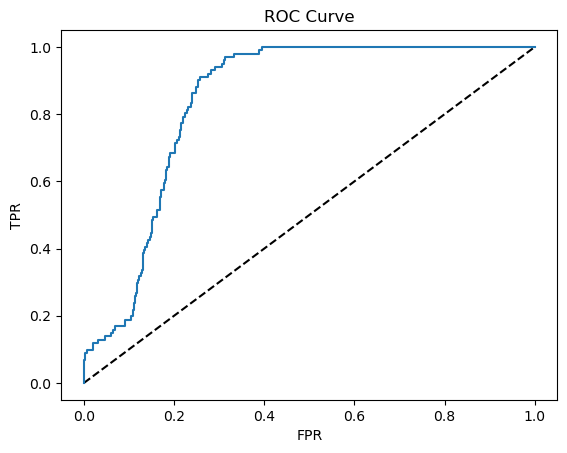

In [78]:
roc = MNB.predict_proba(X_train)[:,1]


fpr,tpr,threshold = m.roc_curve(y_train,roc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='logistic')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title("ROC Curve")
plt.show()

In [79]:
m.roc_auc_score(y_train,roc)

0.8417294698115576

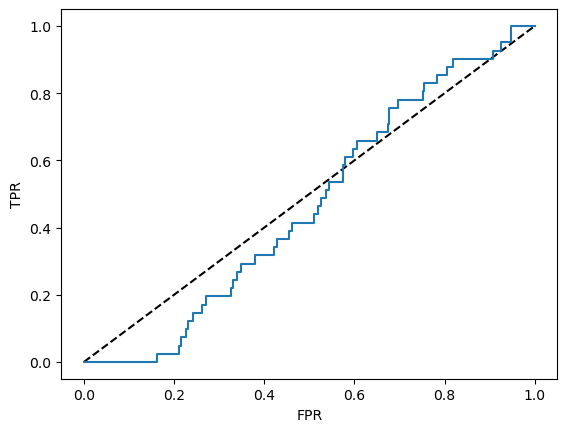

In [80]:
roc1 = MNB.predict_proba(X_test)[:,1]


fpr,tpr,threshold = m.roc_curve(y_test,roc1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='logistic')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [81]:
m.roc_auc_score(y_test,roc1)

0.46620014946667576

### GridSearchCV for Naive Bayse 

In [82]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [83]:
df['combined_features'] = df.iloc[:, 2:].apply(lambda row: ' '.join(row.astype(str)), axis=1)

In [84]:
df['combined_features'] = df['combined_features'].str.lower()

In [85]:
y = df['status_label']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(df['combined_features'], y, test_size=0.2, random_state=42)

In [87]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

In [88]:
param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  # Unigrams or bigrams
    'classifier__alpha': [0.1, 0.5, 1.0, 1.5]  # Smoothing parameter for MultinomialNB
}

In [89]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'classifier__alpha': [0.1, 0.5, 1.0, 1.5],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)]})

In [90]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'classifier__alpha': 1.0, 'vectorizer__ngram_range': (1, 2)}


In [91]:
best_model = grid_search.best_estimator_

In [92]:
y_pred = best_model.predict(X_test)

In [93]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8975


In [94]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       359
           1       0.00      0.00      0.00        41

    accuracy                           0.90       400
   macro avg       0.45      0.50      0.47       400
weighted avg       0.81      0.90      0.85       400



### RandomizedSearchCV for Naive Bayes

In [95]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import uniform

In [96]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

In [97]:
param_distributions = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  # Unigrams or bigrams
    'classifier__alpha': uniform(0.1, 2.0)  # Smoothing parameter for MultinomialNB
}

In [98]:
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, n_jobs=-1)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                             ('classifier', MultinomialNB())]),
                   n_jobs=-1,
                   param_distributions={'classifier__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020D73DBA6D0>,
                                        'vectorizer__ngram_range': [(1, 1),
                                                                    (1, 2)]})

In [99]:
print("Best hyperparameters:", random_search.best_params_)

Best hyperparameters: {'classifier__alpha': 1.3289260526385305, 'vectorizer__ngram_range': (1, 2)}


In [100]:
best_model = random_search.best_estimator_

In [101]:
y_pred = best_model.predict(X_test)

In [102]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 89.75


In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       359
           1       0.00      0.00      0.00        41

    accuracy                           0.90       400
   macro avg       0.45      0.50      0.47       400
weighted avg       0.81      0.90      0.85       400

